<a href="https://colab.research.google.com/github/edso2103/Cuadernos/blob/main/AprendizajeModelos01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> John Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> Machine Learning en Computación Avanzada
<br>
<i><b>Estudiante:</b></i> Edna Sofía Orjuela Puentes
<br>
18/02/21
<br>
</FONT>
</div>

**Se quiere revisar si existe alguna relacion entre la calidad de vida (life satisfaction y el producto interno bruto per capita de cada pais)**

In [ ]:
url01=('/content/drive/MyDrive/Colab Notebooks/GDP_worldbank_2019.csv')
url02=('/content/drive/MyDrive/Colab Notebooks/OCDE_BLI_2020.csv')

In [ ]:
#cargar bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model


In [ ]:
#Se asignan los data set a variables
gdp=pd.read_csv(url01)
ocde=pd.read_csv(url02)

In [ ]:
ocde.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [ ]:
#Se quiere saber cuantas categorias tiene la columna INEQUALITY
ocde['INEQUALITY'].unique()

array(['TOT', 'MN', 'WMN', 'HGH', 'LW'], dtype=object)

In [ ]:
#solo se seleccionan los registros cuya categoria sea TOT
ocde=ocde[ocde['INEQUALITY']== "TOT"]
ocde.head(30)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
5,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.2,NaN,NaN
6,FIN,Finland,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
7,FRA,France,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,7.6,NaN,NaN
8,DEU,Germany,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
9,GRC,Greece,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,29.8,NaN,NaN


In [ ]:
#dimensión
ocde.shape

(911, 17)

In [ ]:
# nombre de las columnas
ocde.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [ ]:
#Se quiere pivotear 'COUNTRY' como indice y conservando los valores y renombrando las columna como indicador (fila principal):
ocde=ocde.pivot(index='Country',columns='Indicator',values='Value')
ocde.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [ ]:
#¿Cuántos valores desaparecidos hay?
ocde.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, Australia to United States
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Air pollution                                      41 non-null     float64
 1   Dwellings without basic facilities                 38 non-null     float64
 2   Educational attainment                             40 non-null     float64
 3   Employees working very long hours                  39 non-null     float64
 4   Employment rate                                    41 non-null     float64
 5   Feeling safe walking alone at night                41 non-null     float64
 6   Homicide rate                                      41 non-null     float64
 7   Household net adjusted disposable income           30 non-null     float64
 8   Household net wealth                               29 non-null     float64
 9 

In [ ]:
ocde.isnull().sum()

Indicator
Air pollution                                         0
Dwellings without basic facilities                    3
Educational attainment                                1
Employees working very long hours                     2
Employment rate                                       0
Feeling safe walking alone at night                   0
Homicide rate                                         0
Household net adjusted disposable income             11
Household net wealth                                 12
Housing expenditure                                   2
Labour market insecurity                              7
Life expectancy                                       0
Life satisfaction                                     0
Long-term unemployment rate                           2
Personal earnings                                     5
Quality of support network                            0
Rooms per person                                      3
Self-reported health                  

In [ ]:
#estadísticas
ocde.describe().T

,count,mean,std,min,25%,50%,75%,max
Indicator,,,,,,,,
Air pollution,41.0,13.341463,5.699166,3.00,10.000,14.00,16.000,28.00
Dwellings without basic facilities,38.0,5.057895,8.334093,0.00,0.325,0.95,6.625,37.00
Educational attainment,40.0,77.775000,14.936597,38.00,76.000,81.50,88.000,94.00
Employees working very long hours,39.0,8.029744,7.783618,0.14,3.360,5.25,11.050,32.64
Employment rate,41.0,68.463415,7.871142,43.00,66.000,69.00,74.000,86.00
Feeling safe walking alone at night,41.0,68.253659,13.847186,35.60,60.000,70.10,77.700,90.10
Homicide rate,41.0,3.436585,6.254469,0.20,0.600,1.00,3.100,26.70
Household net adjusted disposable income,30.0,28000.533333,7012.870020,16275.00,21504.750,29469.50,32395.250,45284.00
Household net wealth,29.0,288004.724138,164375.661472,70160.00,159373.000,259667.00,386006.000,769053.00


In [ ]:
gdp.head()

,Series Name,Series Code,Country Name,Country Code,2019 [YR2019]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,507.103431871987
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,5353.2448564014
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,3973.96407191565
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,40886.3911648431


In [ ]:
#Cambiar columna 2019 por GDP per capita
gdp.rename(columns={'2019 [YR2019]':'GDP per capita'},inplace=True)

In [ ]:
#ubicar la columna country name como indice
gdp.set_index('Country Name',inplace=True)

In [ ]:
gdp.head()

,Series Name,Series Code,Country Code,GDP per capita
Country Name,,,,
Afghanistan,GDP per capita (current US$),NY.GDP.PCAP.CD,AFG,507.103431871987
Albania,GDP per capita (current US$),NY.GDP.PCAP.CD,ALB,5353.2448564014
Algeria,GDP per capita (current US$),NY.GDP.PCAP.CD,DZA,3973.96407191565
American Samoa,GDP per capita (current US$),NY.GDP.PCAP.CD,ASM,..
Andorra,GDP per capita (current US$),NY.GDP.PCAP.CD,AND,40886.3911648431


In [ ]:
gdp.dtypes

Series Name       object
Series Code       object
Country Code      object
GDP per capita    object
dtype: object

In [ ]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, Afghanistan to nan
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Series Name     219 non-null    object
 1   Series Code     217 non-null    object
 2   Country Code    217 non-null    object
 3   GDP per capita  217 non-null    object
dtypes: object(4)
memory usage: 8.7+ KB


In [ ]:
gdp.shape

(222, 4)

In [ ]:
#Se requiere que la columna GDP per capita pase de objeto a tipo numérico
gdp['GDP per capita']=gdp['GDP per capita'].apply(pd.to_numeric,errors='coerce')
gdp.info()


<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, Afghanistan to nan
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Series Name     219 non-null    object 
 1   Series Code     217 non-null    object 
 2   Country Code    217 non-null    object 
 3   GDP per capita  186 non-null    float64
dtypes: float64(1), object(3)
memory usage: 8.7+ KB


In [ ]:
#Se quiere que el GDP per capita este redondeado con tres decimales 
decimales=3
gdp['GDP per capita']=gdp['GDP per capita'].apply(lambda x:round (x,decimales))
gdp.head()

,Series Name,Series Code,Country Code,GDP per capita
Country Name,,,,
Afghanistan,GDP per capita (current US$),NY.GDP.PCAP.CD,AFG,507.103
Albania,GDP per capita (current US$),NY.GDP.PCAP.CD,ALB,5353.245
Algeria,GDP per capita (current US$),NY.GDP.PCAP.CD,DZA,3973.964
American Samoa,GDP per capita (current US$),NY.GDP.PCAP.CD,ASM,NaN
Andorra,GDP per capita (current US$),NY.GDP.PCAP.CD,AND,40886.391


In [ ]:
#Se requiere quitar los valores desaparecidos
gdp.dropna(inplace=True) #en el mismo lugar
gdp.isnull().sum()#suma

Series Name       0
Series Code       0
Country Code      0
GDP per capita    0
dtype: int64

In [ ]:
gdp.head()

,Series Name,Series Code,Country Code,GDP per capita
Country Name,,,,
Afghanistan,GDP per capita (current US$),NY.GDP.PCAP.CD,AFG,507.103
Albania,GDP per capita (current US$),NY.GDP.PCAP.CD,ALB,5353.245
Algeria,GDP per capita (current US$),NY.GDP.PCAP.CD,DZA,3973.964
Andorra,GDP per capita (current US$),NY.GDP.PCAP.CD,AND,40886.391
Angola,GDP per capita (current US$),NY.GDP.PCAP.CD,AGO,2790.727


In [ ]:
ocde.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [ ]:
#Generar un solo dataframe con el ocde y el gdp (que tenga Life satisfaction y GDP per capita)
combi=pd.merge(left=ocde,right=gdp,left_index=True,right_index=True)
combi.sort_values(by='GDP per capita',ascending=False,inplace=True)
combi.head()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Series Name,Series Code,Country Code,GDP per capita
Luxembourg,12.0,0.5,77.0,3.82,66.0,75.8,0.6,39264.0,769053.0,21.0,...,1.7,483.0,NaN,91.0,84.0,15.1,GDP per capita (current US$),NY.GDP.PCAP.CD,LUX,114704.594
Switzerland,15.0,0.1,88.0,0.37,80.0,85.3,0.6,37466.0,NaN,22.0,...,2.3,506.0,NaN,49.0,95.0,17.5,GDP per capita (current US$),NY.GDP.PCAP.CD,CHE,81993.727
Ireland,7.0,1.0,82.0,5.25,67.0,75.9,0.7,25310.0,217130.0,20.0,...,1.3,509.0,NaN,65.0,85.0,18.1,GDP per capita (current US$),NY.GDP.PCAP.CD,IRL,78660.956
Norway,5.0,0.0,82.0,2.93,74.0,90.1,0.4,35725.0,228936.0,17.0,...,2.2,504.0,15.56,78.0,98.0,18.3,GDP per capita (current US$),NY.GDP.PCAP.CD,NOR,75419.635
Iceland,3.0,0.0,77.0,15.06,86.0,86.0,0.5,NaN,NaN,24.0,...,2.1,481.0,NaN,79.0,99.0,19.0,GDP per capita (current US$),NY.GDP.PCAP.CD,ISL,66944.833


In [ ]:
#observar la dimensión del nuevo dataframe
combi.shape

(38, 28)

In [ ]:
#se visualizan los nombres de las columnas del dataset
combi.columns

Index(['Air pollution', 'Dwellings without basic facilities',
       'Educational attainment', 'Employees working very long hours',
       'Employment rate', 'Feeling safe walking alone at night',
       'Homicide rate', 'Household net adjusted disposable income',
       'Household net wealth', 'Housing expenditure',
       'Labour market insecurity', 'Life expectancy', 'Life satisfaction',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health',
       'Stakeholder engagement for developing regulations', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education', 'Series Name', 'Series Code',
       'Country Code', 'GDP per capita'],
      dtype='object')

In [ ]:
#Se requiere unir las columnas de 'GDP per capita' y 'Life Satisfaction'
combi=combi[['GDP per capita','Life satisfaction']]
combi.tail()

,GDP per capita,Life satisfaction
Mexico,9946.034,6.5
Turkey,9126.561,5.5
Brazil,8717.186,6.4
Colombia,6428.676,6.3
South Africa,6001.401,4.7


In [ ]:
#Estadisticas del dataset
combi.describe().T

,count,mean,std,min,25%,50%,75%,max
GDP per capita,38.0,38736.624184,24631.143644,6001.401,19345.34025,40370.4045,51245.6815,114704.594
Life satisfaction,38.0,6.571053,0.754771,4.700,5.92500,6.6000,7.2750,7.600


In [ ]:
combi.head()

,GDP per capita,Life satisfaction
Luxembourg,114704.594,6.9
Switzerland,81993.727,7.5
Ireland,78660.956,7.0
Norway,75419.635,7.6
Iceland,66944.833,7.5


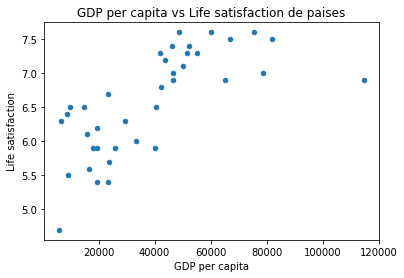

In [ ]:
#se visualizan los datos con grafico de tipo dispersion
combi.plot(kind='scatter',x='GDP per capita',y='Life satisfaction')
plt.title('GDP per capita vs Life satisfaction de paises')
plt.show() #los puntos son los paises


In [ ]:
# satisfaccion de vida en Francia
combi[['GDP per capita','Life satisfaction']].loc['France']

GDP per capita       40493.929
Life satisfaction        6.500
Name: France, dtype: float64

In [ ]:
# satisfaccion de vida en Luxemburgo
combi[['GDP per capita','Life satisfaction']].loc['Luxembourg']

GDP per capita       114704.594
Life satisfaction         6.900
Name: Luxembourg, dtype: float64

In [ ]:
# satisfaccion de vida en Colombia
combi[['GDP per capita','Life satisfaction']].loc['Colombia']

GDP per capita       6428.676
Life satisfaction       6.300
Name: Colombia, dtype: float64

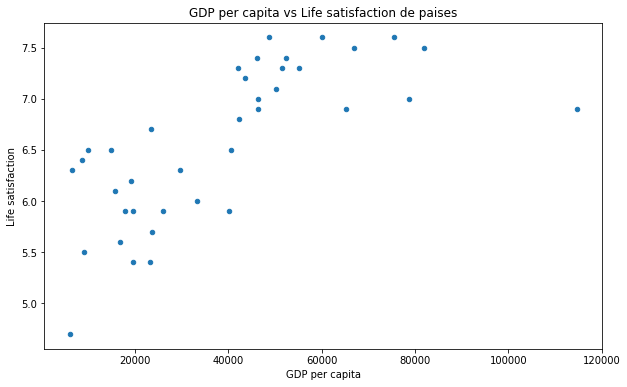

In [ ]:
#datos con gráfica de tamaño 10 y 6 cm
combi.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize= (10,6))
plt.title('GDP per capita vs Life satisfaction de paises')
plt.show()


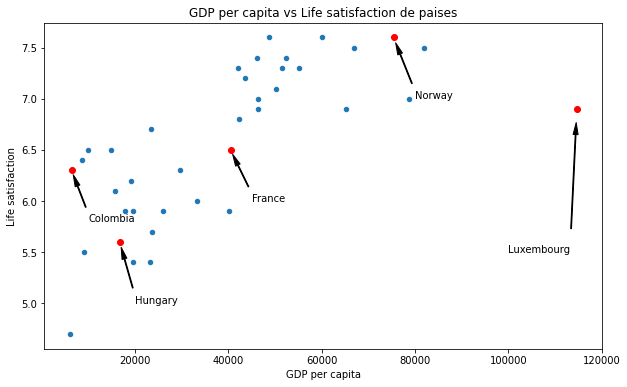

In [ ]:
#graficar con flechas y puntos rojos los siguientes paises
#Luxemburgo, Colombia, Francia, Hungría, Noruega
combi.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize= (10,6))
plt.title('GDP per capita vs Life satisfaction de paises')
#Se crea diccionario con texto y ubicacion del texto(x,y)
text_loc={'Luxembourg':(100000,5.5),
          'Colombia'  :(10000,5.8),
          'France'    :(45000,6.0),
          'Hungary'   :(20000,5.0),
          'Norway'    :(80000,7.0)}
#iterar paises y ubicaciones para representarlas en el grafico
for paises,ubicacionText in text_loc.items():
  pos_x,pos_y=combi.loc[paises]
  plt.annotate(paises,xy=(pos_x,pos_y),xytext=ubicacionText,
               arrowprops=dict(facecolor='black',width=0.8,headwidth=5,shrink=0.1))#color,ancho, ancho de flecha,encoger
  plt.plot(pos_x,pos_y,'ro')

plt.show()


In [ ]:
combi.loc[list(text_loc.keys())] #listar por llaves (paises) del diccionario text_loc

,GDP per capita,Life satisfaction
Luxembourg,114704.594,6.9
Colombia,6428.676,6.3
France,40493.929,6.5
Hungary,16731.822,5.6
Norway,75419.635,7.6


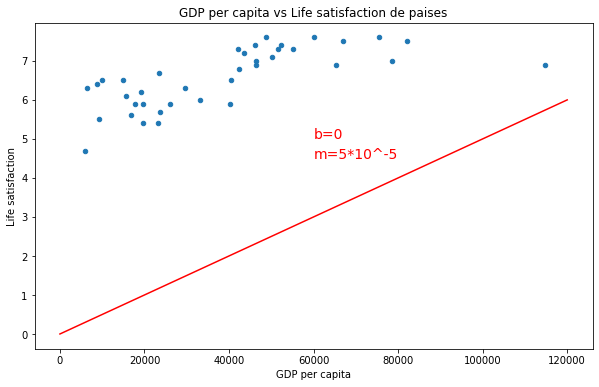

In [ ]:
#trazar diferentes lineas rectas que presenten una relacion entre la satisfaccion de vida y GDP per capita
combi.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize= (10,6))
plt.title('GDP per capita vs Life satisfaction de paises')

X=np.linspace(0,120000)
#conjunto de numeros para hacer la linea recta
#para trazar la linea recta se necesita la pendiente(m) y el punto de intersección(b)
#y=mX+b
plt.plot(X,(0.00005*X),'r')
#Se presenta el valor de la pendiente y el valor del punto de interseccion
plt.text(60000,5,"b=0",fontsize=14,color='r')
plt.text(60000,4.5,"m=5*10^-5",fontsize=14,color='r')
plt.show()


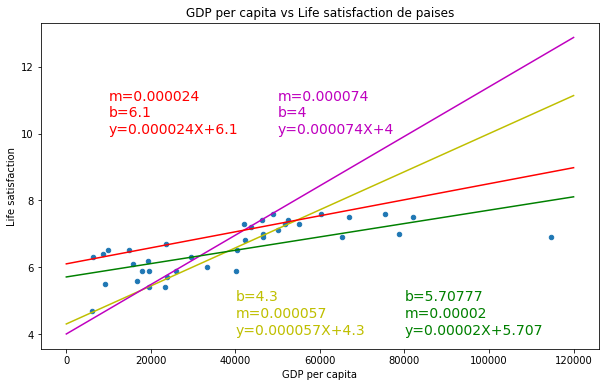

In [ ]:
#trazar diferentes lineas rectas que presenten una relacion entre la satisfaccion de vida y GDP per capita
combi.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize= (10,6))
plt.title('GDP per capita vs Life satisfaction de paises')

X=np.linspace(0,120000)
#conjunto de numeros para hacer la linea recta
#para trazar la linea recta se necesita la pendiente(m) y el punto de intersección(b)
#y=mX+b
plt.plot(X,(0.000057*X)+4.3,'y')
#Se presenta el valor de la pendiente y el valor del punto de interseccion
plt.text(40000,5,"b=4.3",fontsize=14,color='y')
plt.text(40000,4.5,"m=0.000057",fontsize=14,color='y')
plt.text(40000,4.0,"y=0.000057X+4.3",fontsize=14,color='y')

plt.plot(X,(0.000074*X)+4,'m')
#Se presenta el valor de la pendiente y el valor del punto de interseccion
plt.text(50000,10.5,"b=4",fontsize=14,color='m')
plt.text(50000,11,"m=0.000074",fontsize=14,color='m')
plt.text(50000,10,"y=0.000074X+4",fontsize=14,color='m')

plt.plot(X,(0.00002*X)+5.70777,'g')
#Se presenta el valor de la pendiente y el valor del punto de interseccion
plt.text(80000,5,"b=5.70777",fontsize=14,color='g')
plt.text(80000,4.5,"m=0.00002",fontsize=14,color='g')
plt.text(80000,4,"y=0.00002X+5.707",fontsize=14,color='g')

plt.plot(X,(0.000024*X)+6.1,'r')
#Se presenta el valor de la pendiente y el valor del punto de interseccion
plt.text(10000,10.5,"b=6.1",fontsize=14,color='r')
plt.text(10000,11,"m=0.000024",fontsize=14,color='r')
plt.text(10000,10,"y=0.000024X+6.1",fontsize=14,color='r')

plt.show()


In [ ]:
#Identificar la recta que mas se ajusta a los datos por medio del módulo 
#scikit-learn para obtener la pendiente y punto de corte (parametros de ajuste)
from sklearn import linear_model

In [ ]:
regresion=linear_model.LinearRegression()
Xmuestra= np.c_[combi['GDP per capita']]
Ymuestra= np.c_[combi['Life satisfaction']]
regresion.fit(Xmuestra,Ymuestra)

LinearRegression()

In [ ]:
#Se imprime el punto de interseccion 
b=regresion.intercept_[0]
#Se imprime la pendiente
m=regresion.coef_[0][0]
print("La pendiente de la recta es",m)
print("El punto de corte es",b)

La pendiente de la recta es 2.1648185004521793e-05
El punto de corte es 5.732475024788526


Text(60000, 6, 'm=2.16e-05')

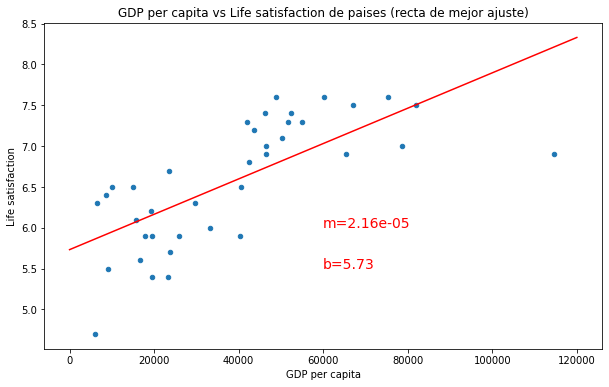

In [ ]:
combi.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize= (10,6))
plt.title('GDP per capita vs Life satisfaction de paises (recta de mejor ajuste)')

X=np.linspace(0,120000)
#conjunto de numeros para hacer la linea recta
#para trazar la linea recta se necesita la pendiente(m) y el punto de intersección(b)
#y=mX+b
plt.plot(X,(m*X)+b,'r')
#Se presenta el valor de la pendiente y el valor del punto de intersección
plt.text(60000,5.5,"b=5.73",fontsize=14,color='r')
plt.text(60000,6,"m=2.16e-05",fontsize=14,color='r')


**Colombia**

In [ ]:
#Encontrar GDP per capita de Colombia
GDPColombia=combi.loc['Colombia']['GDP per capita']
GDPColombia

6428.676

In [ ]:
#Predecir la satisfacción de Colombia
predColSatLife=regresion.predict([[GDPColombia]])[0][0]#Coordenada 0,0 de esa prediccion
print("Prediccion de la calidad de vida en Colombia",predColSatLife)

Prediccion de la calidad de vida en Colombia 5.871644192170655


NameError: ignored

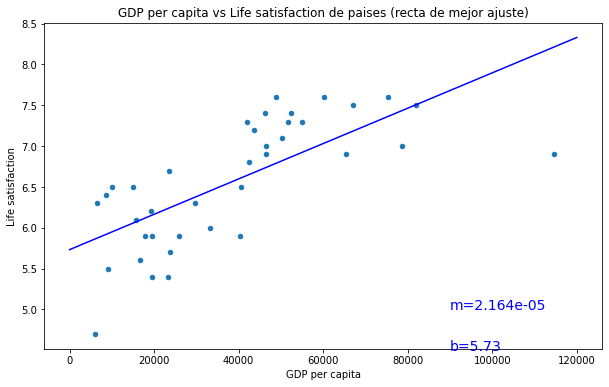

In [ ]:
combi.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize= (10,6))
plt.title('GDP per capita vs Life satisfaction de paises (recta de mejor ajuste)')

X=np.linspace(0,120000)
#conjunto de numeros para hacer la linea recta
#para trazar la linea recta se necesita la pendiente(m) y el punto de intersección(b)
#y=mX+b
plt.plot(X,(m*X)+b,'b')
#Se presenta el valor de la pendiente y el valor del punto de intersección
plt.text(90000,4.5,"b=5.73",fontsize=14,color='b')
plt.text(90000,5,"m=2.164e-05",fontsize=14,color='b')
y
text_loc={'Colombia'  :(10000,7)}
#iterar paises y ubicaciones para representarlas en el grafico
for paises,ubicacionText in text_loc.items():
  pos_x,pos_y=combi.loc[paises]
  plt.annotate(paises,xy=(pos_x,pos_y),xytext=ubicacionText,
               arrowprops=dict(facecolor='black',width=0.8,headwidth=5,shrink=0.1))#color,ancho, ancho de flecha,encoger
  plt.plot(pos_x,pos_y,'ro')

plt.plot([GDPColombia,GDPColombia],[4,predColSatLife],'r--')
plt.text(10000,5,"Predicción Life Satisfaction=5.87 ",fontsize=14,color='r')
plt.show()

In [ ]:
#Satisfaccion de vida real
SatColombia=combi.loc['Colombia']['Life satisfaction']
SatColombia

In [ ]:
#Predecir manualmente la satisfaccion de vida en Colombia 
#Usando y=mX+b donde X es el GDPColombia
satisfacManualCol= (m*GDPColombia)+b
satisfacManualCol
#Se observa que si corresponde a la predicción de la gráfica

**Portugal**

In [ ]:
#Predecir manualmente la satisfaccion de vida en Portugal, España, Eslovenia, Brasil, Panamá
#Portugal
GDPPortugal=combi.loc['Portugal']['GDP per capita']
print("GDP per capita de Portugal",GDPPortugal)
#Predecir la satisfacción de Portugal
predPortuSatLife=regresion.predict([[GDPPortugal]])[0][0]#Coordenada 0,0 de esa prediccion

print("Prediccion de la calidad de vida en Portugal",predPortuSatLife)


In [ ]:

combi.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize= (10,6))
plt.title('GDP per capita vs Life satisfaction de paises (recta de mejor ajuste)')

X=np.linspace(0,120000)
#conjunto de numeros para hacer la linea recta
#para trazar la linea recta se necesita la pendiente(m) y el punto de intersección(b)
#y=mX+b
plt.plot(X,(m*X)+b,'b')
#Se presenta el valor de la pendiente y el valor del punto de intersección
plt.text(90000,4.5,"b=5.73",fontsize=14,color='b')
plt.text(90000,5,"m=2.164e-05",fontsize=14,color='b')

text_loc={'Portugal'  :(10000,7)}
#iterar paises y ubicaciones para representarlas en el grafico
for paises,ubicacionText in text_loc.items():
  pos_x,pos_y=combi.loc[paises]
  plt.annotate(paises,xy=(pos_x,pos_y),xytext=ubicacionText,
               arrowprops=dict(facecolor='black',width=0.8,headwidth=5,shrink=0.1))#color,ancho, ancho de flecha,encoger
  plt.plot(pos_x,pos_y,'ro')

plt.plot([GDPPortugal,GDPPortugal],[4,predPortuSatLife],'r--')
plt.text(25000,5,"Predicción Life Satisfaction=6.23 ",fontsize=14,color='r')
plt.show()


In [ ]:
#Satisfaccion de vida real
SatPortugal=combi.loc['Portugal']['Life satisfaction']
SatPortugal

In [ ]:
#Predecir manualmente la satisfaccion de vida en Portugal 
#Usando y=mX+b donde X es el GDPPortugal
satisfacManualPortu= (m*GDPPortugal)+b
satisfacManualPortu
#Se observa que si corresponde a la predicción de la gráfica

**España**

In [ ]:
#Predecir manualmente la satisfaccion de vida en Portugal, España, Eslovenia, Brasil, Chile
#España
GDPEspaña=combi.loc['Spain']['GDP per capita']
print("GDP per capita de España",GDPEspaña)
#Predecir la satisfacción de España
predEspaSatLife=regresion.predict([[GDPEspaña]])[0][0]#Coordenada 0,0 de esa prediccion

print("Prediccion de la calidad de vida en España",predEspaSatLife)

In [ ]:
combi.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize= (10,6))
plt.title('GDP per capita vs Life satisfaction de paises (recta de mejor ajuste)')

X=np.linspace(0,120000)
#conjunto de numeros para hacer la linea recta
#para trazar la linea recta se necesita la pendiente(m) y el punto de intersección(b)
#y=mX+b
plt.plot(X,(m*X)+b,'b')
#Se presenta el valor de la pendiente y el valor del punto de intersección
plt.text(90000,4.5,"b=5.73",fontsize=14,color='b')
plt.text(90000,5,"m=2.164e-05",fontsize=14,color='b')

text_loc={'Spain'  :(10000,7)}
#iterar paises y ubicaciones para representarlas en el grafico
for paises,ubicacionText in text_loc.items():
  pos_x,pos_y=combi.loc[paises]
  plt.annotate(paises,xy=(pos_x,pos_y),xytext=ubicacionText,
               arrowprops=dict(facecolor='black',width=0.8,headwidth=5,shrink=0.1))#color,ancho, ancho de flecha,encoger
  plt.plot(pos_x,pos_y,'ro')

plt.plot([GDPEspaña,GDPEspaña],[4,predEspaSatLife],'r--')
plt.text(30000,5,"Predicción Life Satisfaction=6.37 ",fontsize=14,color='r')
plt.show()

In [ ]:
#Satisfaccion de vida real
SatEspaña=combi.loc['Spain']['Life satisfaction']
SatEspaña

In [ ]:
#Predecir manualmente la satisfaccion de vida en España
#Usando y=mX+b donde X es el GDPEspaña
satisfacManualEsp= (m*GDPEspaña)+b
satisfacManualEsp
#Se observa que si corresponde a la predicción de la gráfica

**Eslovenia**

In [ ]:
#Predecir manualmente la satisfaccion de vida en Portugal, España, Eslovenia, Brasil, Chile
#Eslovenia
GDPEslov=combi.loc['Slovenia']['GDP per capita']
print("GDP per capita de Eslovenia",GDPEslov)
#Predecir la satisfacción de Eslovenia
predEslovSatLife=regresion.predict([[GDPEslov]])[0][0]#Coordenada 0,0 de esa prediccion

print("Prediccion de la calidad de vida en Eslovenia",predEslovSatLife)

In [ ]:
combi.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize= (10,6))
plt.title('GDP per capita vs Life satisfaction de paises (recta de mejor ajuste)')

X=np.linspace(0,120000)
#conjunto de numeros para hacer la linea recta
#para trazar la linea recta se necesita la pendiente(m) y el punto de intersección(b)
#y=mX+b
plt.plot(X,(m*X)+b,'b')
#Se presenta el valor de la pendiente y el valor del punto de intersección
plt.text(90000,4.5,"b=5.73",fontsize=14,color='b')
plt.text(90000,5,"m=2.164e-05",fontsize=14,color='b')

text_loc={'Slovenia'  :(10000,7)}
#iterar paises y ubicaciones para representarlas en el grafico
for paises,ubicacionText in text_loc.items():
  pos_x,pos_y=combi.loc[paises]
  plt.annotate(paises,xy=(pos_x,pos_y),xytext=ubicacionText,
               arrowprops=dict(facecolor='black',width=0.8,headwidth=5,shrink=0.1))#color,ancho, ancho de flecha,encoger
  plt.plot(pos_x,pos_y,'ro')

plt.plot([GDPEslov,GDPEslov],[4,predEslovSatLife],'r--')
plt.text(27000,5,"Predicción Life Satisfaction=6.29 ",fontsize=14,color='r')
plt.show()

In [ ]:
#Satisfaccion de vida real
SatEslovenia=combi.loc['Slovenia']['Life satisfaction']
SatEslovenia

In [ ]:
#Predecir manualmente la satisfaccion de vida en Eslovenia
#Usando y=mX+b donde X es el GDPEslovenia
satisfacManualEslov= (m*GDPEslov)+b
satisfacManualEslov
#Se observa que si corresponde a la predicción de la gráfica

**Brasil**

In [ ]:
#Predecir manualmente la satisfaccion de vida en Portugal, España, Eslovenia, Brasil, Chile
#Brasil
GDPBrasil=combi.loc['Brazil']['GDP per capita']
print("GDP per capita de Brasil",GDPBrasil)
#Predecir la satisfacción de Brasil
predBrasilSatLife=regresion.predict([[GDPBrasil]])[0][0]#Coordenada 0,0 de esa prediccion

print("Prediccion de la calidad de vida en Brasil",predBrasilSatLife)

In [ ]:
combi.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize= (10,6))
plt.title('GDP per capita vs Life satisfaction de paises (recta de mejor ajuste)')

X=np.linspace(0,120000)
#conjunto de numeros para hacer la linea recta
#para trazar la linea recta se necesita la pendiente(m) y el punto de intersección(b)
#y=mX+b
plt.plot(X,(m*X)+b,'b')
#Se presenta el valor de la pendiente y el valor del punto de intersección
plt.text(90000,4.5,"b=5.73",fontsize=14,color='b')
plt.text(90000,5,"m=2.164e-05",fontsize=14,color='b')

text_loc={'Brazil'  :(10000,7)}
#iterar paises y ubicaciones para representarlas en el grafico
for paises,ubicacionText in text_loc.items():
  pos_x,pos_y=combi.loc[paises]
  plt.annotate(paises,xy=(pos_x,pos_y),xytext=ubicacionText,
               arrowprops=dict(facecolor='black',width=0.8,headwidth=5,shrink=0.1))#color,ancho, ancho de flecha,encoger
  plt.plot(pos_x,pos_y,'ro')

plt.plot([GDPBrasil,GDPBrasil],[4,predBrasilSatLife],'r--')
plt.text(10000,4.5,"Predicción Life Satisfaction=5.92 ",fontsize=14,color='r')
plt.show()

In [ ]:
#Satisfaccion de vida real
SatBrasil=combi.loc['Brazil']['Life satisfaction']
SatBrasil

In [ ]:
#Predecir manualmente la satisfaccion de vida en Brasil
#Usando y=mX+b donde X es el GDPBrasil
satisfacManualBrasil= (m*GDPBrasil)+b
satisfacManualBrasil
#Se observa que si corresponde a la predicción de la gráfica

**Chile**

In [ ]:
#Predecir manualmente la satisfaccion de vida en Portugal, España, Eslovenia, Brasil, Chile
#Chile
GDPChile=combi.loc['Chile']['GDP per capita']
print("GDP per capita de Chile",GDPChile)
#Predecir la satisfacción de Brasil
predChileSatLife=regresion.predict([[GDPChile]])[0][0]#Coordenada 0,0 de esa prediccion

print("Prediccion de la calidad de vida en Brasil",predChileSatLife)

In [ ]:
combi.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize= (10,6))
plt.title('GDP per capita vs Life satisfaction de paises (recta de mejor ajuste)')
X=np.linspace(0,120000)
#conjunto de numeros para hacer la linea recta
#para trazar la linea recta se necesita la pendiente(m) y el punto de intersección(b)
#y=mX+b
plt.plot(X,(m*X)+b,'b')
#Se presenta el valor de la pendiente y el valor del punto de intersección
plt.text(90000,4.5,"b=5.73",fontsize=14,color='b')
plt.text(90000,5,"m=2.164e-05",fontsize=14,color='b')

text_loc={'Chile'  :(10000,7)}
#iterar paises y ubicaciones para representarlas en el grafico
for paises,ubicacionText in text_loc.items():
  pos_x,pos_y=combi.loc[paises]
  plt.annotate(paises,xy=(pos_x,pos_y),xytext=ubicacionText,
               arrowprops=dict(facecolor='black',width=0.8,headwidth=5,shrink=0.1))#color,ancho, ancho de flecha,encoger
  plt.plot(pos_x,pos_y,'ro')

plt.plot([GDPChile,GDPChile],[4,predChileSatLife],'r--')
plt.text(20000,4.5,"Predicción Life Satisfaction=6.05 ",fontsize=14,color='r')
plt.show()

In [ ]:
#Satisfaccion de vida real
SatChile=combi.loc['Chile']['Life satisfaction']
SatChile

In [ ]:
#Predecir manualmente la satisfaccion de vida en Chile
#Usando y=mX+b donde X es el GDPChile
satisfacManualChile= (m*GDPChile)+b
satisfacManualChile
#Se observa que si corresponde a la predicción de la gráfica

#Sobreajuste

El sobreajusre se produce cuando el modelo es demasiado complejo en relacion con la cantidad y el ruido de los datos de entrenamiento. Las posibles soluciones son:


*   Simplificar el modelo significado con menos parametros( un modelo lineal en lugar de un modelo polinomico de alto grado), reduciendo el número de atributos en los datos de entrenamiento o restringiendo el modelo
*   Reunir más datos de entrenamiento
*   Reducir el ruido de los datos de entrenamiento(ej. corregir los errores y valores atípicos)








In [ ]:
from sklearn import preprocessing
from sklearn import pipeline #Sobreajuste
#bias es la parcialización
polinomio=preprocessing.PolynomialFeatures(degree=2,include_bias=False)
escalar=preprocessing.StandardScaler()#Todos los datos tienen la misma escala
modelolineal=linear_model.LinearRegression()
Xmuestra= np.c_[combi['GDP per capita']]
Ymuestra= np.c_[combi['Life satisfaction']]


In [ ]:
regresionSecuencial=pipeline.Pipeline([('Polinomio',polinomio),('Escalar',escalar),('Lineal',modelolineal)])
regresionSecuencial.fit(Xmuestra,Ymuestra)


In [ ]:
#Scatter dispersion
combi.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize= (10,6))
plt.title('GDP per capita vs Life satisfaction de paises')

x=np.linspace(0,120000,1000)

curva=regresionSecuencial.predict(x[:,np.newaxis])#operaciones de corte de longitud 1
plt.plot(x,curva)
plt.show()

In [ ]:
polinomio=preprocessing.PolynomialFeatures(degree=60,include_bias=False)
escalar=preprocessing.StandardScaler()#Todos los datos tienen la misma escala
modelolineal=linear_model.LinearRegression()
Xmuestra= np.c_[combi['GDP per capita']]
Ymuestra= np.c_[combi['Life satisfaction']]

regresionSecuencial=pipeline.Pipeline([('Polinomio',polinomio),('Escalar',escalar),('Lineal',modelolineal)])
regresionSecuencial.fit(Xmuestra,Ymuestra)

combi.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize= (10,6))
plt.title('GDP per capita vs Life satisfaction de paises(modelo con sobre ajuste)')

plt.axis([0,120000,0,10])
x=np.linspace(0,120000,1000)

curva=regresionSecuencial.predict(x[:,np.newaxis])#operaciones de corte de longitud 1
plt.plot(x,curva)
plt.show()